<a href="https://colab.research.google.com/github/cool60334/111-TibaMe-AI-03-Deep-Learning/blob/main/DL_CNN_Cifar10%E8%BE%A8%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from keras.datasets.cifar10 import load_data

In [32]:
(x_train, y_train), (x_test, y_test) = load_data()

In [33]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [34]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck",
]

dog


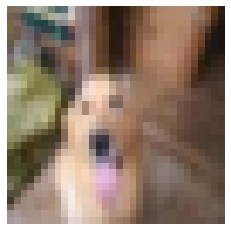

In [36]:
c = random.randint(0, 49999)
plt.axis("off")

# print(y_train[c]) # print的結果是list，方便之後擴充
category = y_train[c][0]

print(trans[category])

plt.imshow(x_train[c])

# 資料預處理

In [37]:
# 資料預處理(題目)
# 卷積不必將資料攤開成一維
# 將題目Normalize成0~1的數
x_train_shape = x_train / 255.0
x_test_shape = x_test / 255.0

In [38]:
# 將答案reshape成為一個list
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# 建立模型

In [39]:
from keras.models import Sequential # 支架
from keras.layers import Dense, Flatten  # 全連接層，平坦層
from keras.layers import Conv2D, MaxPooling2D  # 卷積，池化

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten

# 卷積層Conv2D(過濾器數目，(過濾器寬高 寬高相同可只輸入一個數字)，
#               input_shape -> 輸入多維的圖的尺寸，
#               padding -> 做完卷積後補一圈，激活函式)

# 一個filter寬高為(3 * 3 * 3) * 64個filters + 64個bias = 1792個參數

layers = [
    
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1個filter(3 * 3 * 64) * 128(種) + 128(bias) = 73856個參數
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(256, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    Conv2D(512, 3, padding="same", activation="relu"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),  # GAP 把2*2的圖的4個分數做平均，將位置資訊撇除，最後剩下1*512層共512個值
    Dense(10, activation="softmax")

]
cnn = Sequential(layers)
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)       

# 確定模型訓練方式

In [41]:
# 確定模型訓練方式
# loss -> 最後答案為0或1，使用binary_crossentropy，最後答案有多個，使用categorical_crossentropy
# optimizer -> 做梯度下降的時候優化(基於動量)
from tensorflow.keras.losses import SparseCategoricalCrossentropy # Sparse表示保留非0位置

cnn.compile(loss = SparseCategoricalCrossentropy(), 
            metrics = ["accuracy"],
            optimizer = "adam")

# 訓練模型

In [42]:
# batch -> 看幾筆資料就做一次梯度下降
# epochs -> 整份資料看幾次
# 10個epochs， 200batch = 60000 * 10 / 200 = 3000次梯度修正
# verbose -> 2: 去除進度條

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    # ModelCheckpoint("cnn.h5", save_best_only=True),  # 儲存最好係數的模型
    EarlyStopping(patience=5, restore_best_weights=True)  # 當訓練成效跟最好的比不佳n次時，就及早停止 restore_best_weights=True 回到最好那次的係數
        ]

cnn.fit(
    x_train_shape,
    y_train,
    batch_size=200,
    epochs=50,
    validation_split=0.1,
    callbacks=callbacks,
    verbose=2
    )

Epoch 1/50
225/225 - 5s - loss: 1.6802 - accuracy: 0.3794 - val_loss: 1.3353 - val_accuracy: 0.5206 - 5s/epoch - 22ms/step
Epoch 2/50
225/225 - 4s - loss: 1.2449 - accuracy: 0.5535 - val_loss: 1.1119 - val_accuracy: 0.6004 - 4s/epoch - 18ms/step
Epoch 3/50
225/225 - 4s - loss: 1.0240 - accuracy: 0.6403 - val_loss: 0.9420 - val_accuracy: 0.6644 - 4s/epoch - 18ms/step
Epoch 4/50
225/225 - 4s - loss: 0.9025 - accuracy: 0.6817 - val_loss: 0.8747 - val_accuracy: 0.6952 - 4s/epoch - 19ms/step
Epoch 5/50
225/225 - 4s - loss: 0.7868 - accuracy: 0.7262 - val_loss: 0.8016 - val_accuracy: 0.7210 - 4s/epoch - 19ms/step
Epoch 6/50
225/225 - 4s - loss: 0.6960 - accuracy: 0.7572 - val_loss: 0.7516 - val_accuracy: 0.7460 - 4s/epoch - 18ms/step
Epoch 7/50
225/225 - 4s - loss: 0.6159 - accuracy: 0.7834 - val_loss: 0.7729 - val_accuracy: 0.7334 - 4s/epoch - 19ms/step
Epoch 8/50
225/225 - 4s - loss: 0.5467 - accuracy: 0.8089 - val_loss: 0.6826 - val_accuracy: 0.7648 - 4s/epoch - 19ms/step
Epoch 9/50
225/2

# 進行預測

In [49]:
# 預測完和正確答案做比較
cnn.evaluate(x_test_shape, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7162 - accuracy: 0.7731


[0.7162317037582397, 0.7731000185012817]

In [50]:
# 分類

import numpy as np

pre = np.argmax(cnn.predict(x_test_shape), axis = 1)
pre

313/313 [==============================] - 1s 3ms/step


array([3, 8, 8, ..., 5, 4, 7])

# 找出預測錯誤的類別

In [52]:
import pandas as pd

# 混淆矩陣

from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))  # 測試用答案，預測用題目

,0,1,2,3,4,5,6,7,8,9
0,845,5,33,12,19,3,11,9,51,12
1,30,822,8,14,6,4,9,4,34,69
2,54,1,693,45,86,34,68,13,4,2
3,19,2,75,633,80,98,58,22,4,9
4,12,1,54,43,804,17,51,13,5,0
5,15,1,60,172,55,631,31,26,6,3
6,5,0,34,47,26,12,870,3,3,0
7,11,1,42,35,114,47,10,736,1,3
8,49,9,12,16,10,4,6,0,887,7
9,42,46,20,24,4,4,13,11,26,810


In [53]:
# != -> 表示不相等的會顯示True
# np.nonzero -> 找出不等於0(True)的位子，結果是一個Tuple
y_dim = y_test.reshape(10000)
diff = np.nonzero(pre != y_dim)[0]

# 將"預測錯誤的"位子代入測試用答案，以顯示數字
orifalse = y_dim[diff]

# 將"預測錯誤的"位子代入測試用題目，以顯示數字
prefalse = pre[diff]

# 圖將"預測錯誤的"位子代入圖，以顯示圖
imgfalse = x_test[diff]

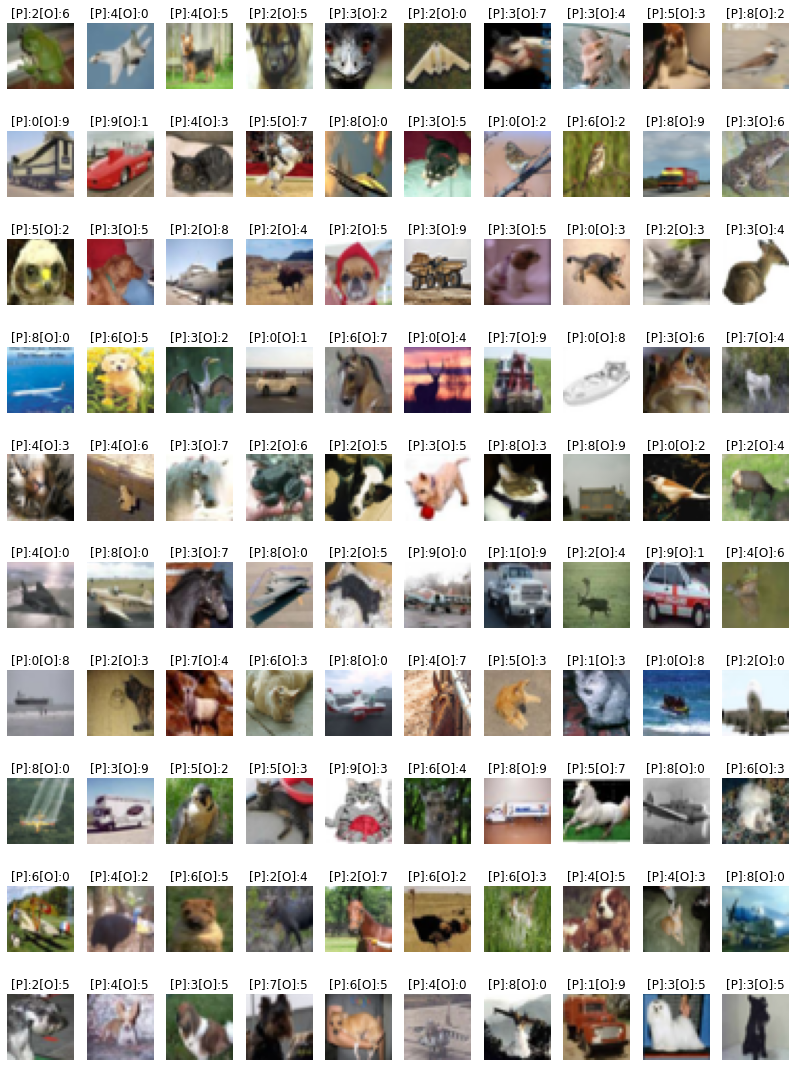

In [54]:
# 設定畫布尺寸
plt.figure(figsize=(14, 450))

# 設定圖片寬高
w = 10
h = int(len(imgfalse) / 10) + 1  # 25

# 印出預測錯的圖片，P -> 預測數字，O -> 正確數字
for (i, img) in enumerate(imgfalse[0:100]):

  # 將畫布分成數塊做出小圖(列數， 行數， 第幾張圖開始)
  plt.subplot(h, w, i + 1)

  # 取消XY座標軸
  plt.axis("off")

  # 每個圖的標題
  t = "[P]:" + str(prefalse[i]) + "[O]:" + str(orifalse[i])
  plt.title(t)
  plt.imshow(img)

/usr/local/lib/python3.8/dist-packages/urllib3/connectionpool.py:842: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn((


1/1 [==============================] - 0s 16ms/step
airplane 的機率: 1e-04
automobile 的機率: 0.0
bird 的機率: 0.0496
cat 的機率: 0.232
deer 的機率: 0.0199
dog 的機率: 0.6626
frog 的機率: 0.0052
horse 的機率: 0.0303
ship 的機率: 1e-04
truck 的機率: 0.0
最高機率: dog


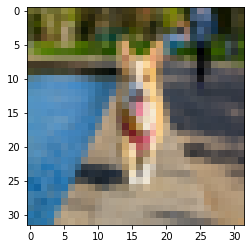

In [55]:
import requests
from PIL import Image
url = "https://i2.wp.com/www.spaceadvisor.com/blog/wp-content/uploads/2018/08/animal-corgi-dog-58997.jpg?fit=2048%2C1365&ssl=1" #@param {type:"string"}
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw)
img = img.resize((32, 32)).convert("RGB")
# (32, 32, 3)X -> (1, 32, 32, 3)
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.0
pre = cnn.predict(img_np)[0]
for t, p in zip(trans, pre):
    print(t, "的機率:", round(p, 4))

print("最高機率:", trans[pre.argmax()])
plt.imshow(img)